# Neural Network Problem 1

#### Task:
Predict the burned area of forest fires with neural networks.

#### Data description:
- month :	month of the year: 'jan' to 'dec'
- day :	day of the week: 'mon' to 'sun'
- FFMC : 	FFMC index from the FWI system: 18.7 to 96.20
- DMC : 	DMC index from the FWI system: 1.1 to 291.3
- DC : DC index from the FWI system: 7.9 to 860.6
- ISI : ISI index from the FWI system: 0.0 to 56.10
- temp :	temperature in Celsius degrees: 2.2 to 33.30
- RH :	relative humidity in %: 15.0 to 100
- wind :	wind speed in km/h: 0.40 to 9.40
- rain :	outside rain in mm/m2 : 0.0 to 6.4
- size_category :	the burned area of the forest ( Small , Large)

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - Remove Bias in the model
    - Split dataset train and test for NN Classification of original dataset.
    - Viasualising the clusters
3. Neural Network Modelling
    - Build Model
    - Compile Model & Fit the model
    - Model Evaluation
    - Visualize Training History
4. Tuning HyperParameters
    - GridSearch taking 2 Hyperparameters at a time
4. Final NN Model
    - Build Final NN Model
    - Model Evaluation Report
5. Conclusion

## Import New Dataset

In [4]:
#! pip install tensorflow
#! pip install keras

In [5]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generating reproducible results from same code
tf.random.set_seed(14)  #Reference: https://www.youtube.com/watch?v=4ZhnXxfW8WQ&list=LL&index=1&t=1743s

In [6]:
raw_data = pd.read_csv("//Users//sreeramkn//Downloads//forestfires.csv")
raw_data.head() 
#Dummy variables are also created in this process. However we do not require them since we can use label encoding.

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
df = raw_data.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)

In [8]:
df.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<AxesSubplot:>

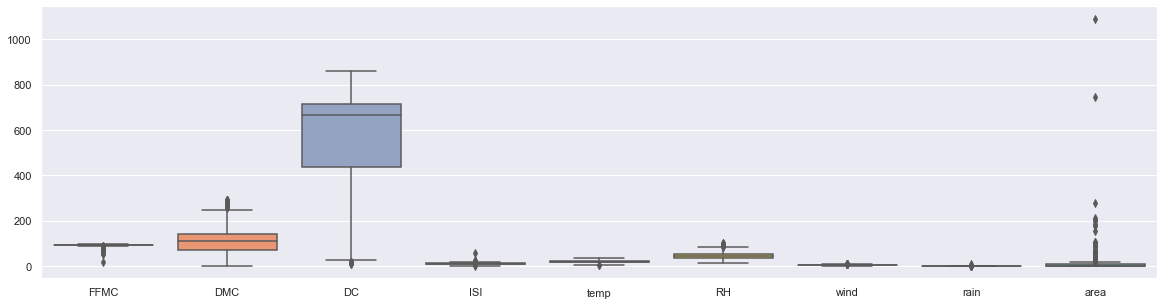

In [10]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df, orient="v", palette="Set2") 
#There are outliers in the case of area. But we cannot discard it

## Feature Analysis

All features in the dataset can be used in model building. 

In [11]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [12]:
df.size_category.value_counts() # The dataset is biased. Lets remove the bias.

small    378
large    139
Name: size_category, dtype: int64

In [13]:
#We are going to perform label encoding since it is faster than dummy variables

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### Removing Bias in the Dataset

In [14]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 378, 0: 139})
Counter({1: 368, 0: 368})


### Train | Split dataset
#### Original Dataset

In [15]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

### Visualizing the data

Text(0.5, 1.0, 'T-Sine Visualization of forest-fire dataset')

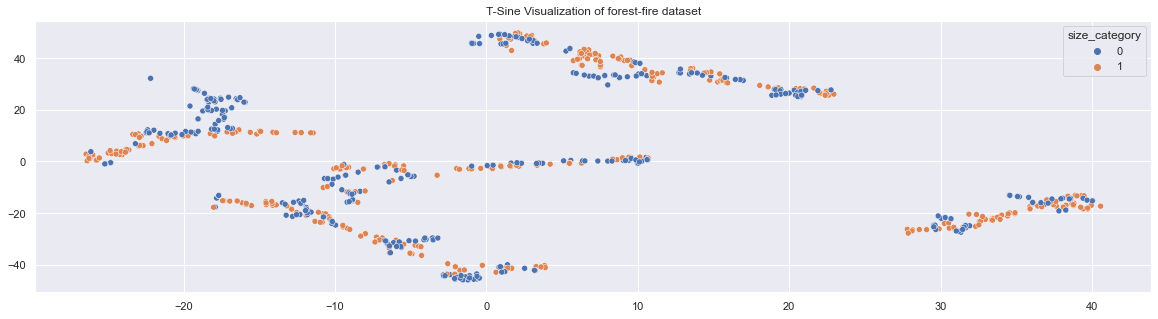

In [16]:
#Visualising the data via dimensionality reduction t-Sine Technique
from sklearn.manifold import TSNE

data_tsne_pca = TSNE(n_components=2).fit_transform(a)
sns.scatterplot(data_tsne_pca[:,0],data_tsne_pca[:,1],hue=b, palette="deep").set_title('T-Sine Visualization of forest-fire dataset')

## Neural Network Modelling
#### Building the Model

In [17]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [18]:
import keras
keras. __version__ #init method is not available in this mdethod

'2.8.0'

In [19]:
# create model
model1 = Sequential()
model1.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [20]:
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Fit the model
hist1 = model1.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10)
#At epoch 25 itself our model reaches accuracy of 98% which maybe overfitting

Epoch 1/30
35/35 [==============================] - 1s 4ms/step - loss: 0.6898 - accuracy: 0.5652 - val_loss: 0.6817 - val_accuracy: 0.7294
Epoch 2/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6087 - val_loss: 0.6629 - val_accuracy: 0.7824
Epoch 3/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7072 - val_loss: 0.6137 - val_accuracy: 0.7706
Epoch 4/30
35/35 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7014 - val_loss: 0.5301 - val_accuracy: 0.7353
Epoch 5/30
35/35 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7855 - val_loss: 0.4176 - val_accuracy: 0.8824
Epoch 6/30
35/35 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8551 - val_loss: 0.3549 - val_accuracy: 0.8176
Epoch 7/30
35/35 [==============================] - 0s 976us/step - loss: 0.3218 - accuracy: 0.8696 - val_loss: 0.2576 - val_accuracy: 0.9765
Epoch 8/30
35/35 [

In [22]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


#### Model Evaluation

In [23]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9910


In [24]:
print(hist1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.068279,0.982609,0.054672,0.976471,25
26,0.050579,0.985507,0.068881,0.964706,26
27,0.035326,0.991304,0.054412,0.982353,27
28,0.036185,0.988406,0.031701,0.994118,28
29,0.041503,0.985507,0.031189,0.994118,29


#### Visualize Training History

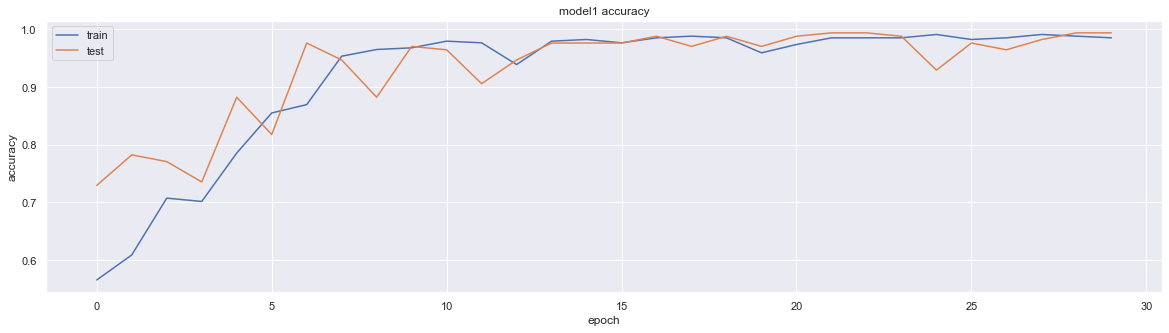

In [26]:
# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

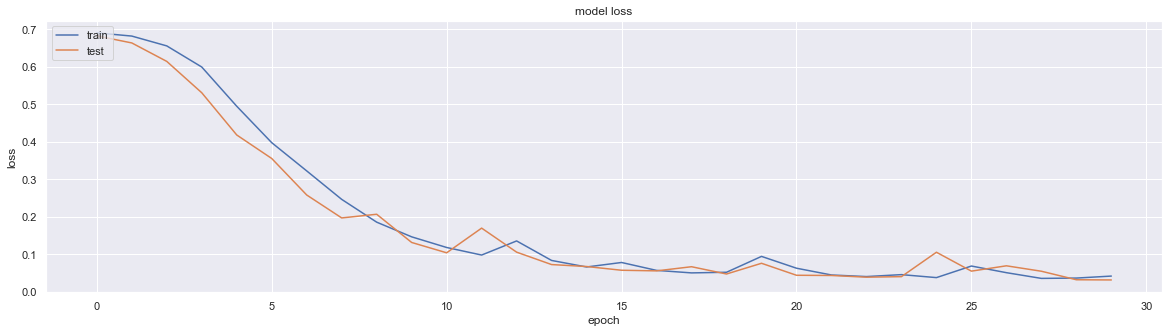

In [27]:
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #Loss decreases and starts oscillating after 25


## Tuning Hyper Parameters

#### Standardizing X values

In [28]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [29]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

#### Tuning set 1 : Batch Size and Epochs

In [30]:
# create model function
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01) #learning rate = 0.01
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [31]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,25,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.912, total=   0.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.905, total=   0.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.905, total=   0.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.973, total=   0.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.993, total=   0.7s
[CV] batch_size=10, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=25, score=0.993, total=   1.2s
[CV] batch_size=10, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=25, score=0.946, total=   1.2s
[CV] batch_size=10, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=25, score=0.946, total=   1.2s
[CV] batch_size=10, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=25, score=0.966, total=   1.4s
[CV] batch_size=10, epochs=25 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=25, score=0.932, total=   1.3s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.993, total=   1.8s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.884, total=   2.0s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.932, total=   1.8s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.939, total=   2.0s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.993, total=   1.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   3.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.2min finished


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
#According to this, the best batch size is 20 and epochs is 50

Best : 0.9796102285385132, using {'batch_size': 20, 'epochs': 50}
0.9375344753265381,0.03777054455474253 with: {'batch_size': 10, 'epochs': 10}
0.9564717650413513,0.0213551183663881 with: {'batch_size': 10, 'epochs': 25}
0.9483085155487061,0.0411875499521018 with: {'batch_size': 10, 'epochs': 50}
0.9727891087532043,0.030116939072387754 with: {'batch_size': 10, 'epochs': 100}
0.9484464168548584,0.03643021842557872 with: {'batch_size': 20, 'epochs': 10}
0.9510388016700745,0.020843585845908574 with: {'batch_size': 20, 'epochs': 25}
0.9796102285385132,0.01217940091864611 with: {'batch_size': 20, 'epochs': 50}
0.9673561215400696,0.022938654218609664 with: {'batch_size': 20, 'epochs': 100}
0.9088527202606201,0.06702441824285155 with: {'batch_size': 40, 'epochs': 10}
0.9483085036277771,0.0371716605129775 with: {'batch_size': 40, 'epochs': 25}
0.9659955859184265,0.03305506866444591 with: {'batch_size': 40, 'epochs': 50}
0.9741680383682251,0.018467558519134345 with: {'batch_size': 40, 'epochs':

#### Tuning set 2 : Learning Rate and Dropout Rate

In [33]:
from keras.layers import Dropout

# Defining the model

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.993, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.966, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.952, total=   1.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.973, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.993, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.986, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.946, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.939, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.966, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.980, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.939, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.626, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.966, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.980, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.973, total=   1.1s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.993, total=   1.2s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   54.2s finished


In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))
#Best score for Dropout rate = 0.2 and learning rate is 0.001

Best : 0.9795918345451355, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9755193829536438,0.0158767835470463 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9632836937904358,0.01857828728836549 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8966813683509827,0.1361073775618733 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9768799543380737,0.01953516592767527 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9741588473320008,0.018464804774706918 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.925170075893402,0.04280852105165602 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9795918345451355,0.016663192450207462 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.972807502746582,0.018767177462280602 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.6506710886955261,0.3298687035033805 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning set 3 : Activation Function and Kernel Initializer

In [35]:
# Defining the model

def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids3 = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=0.000, total=   1.3s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.687, total=   1.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.408, total=   1.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.483, total=   1.7s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.000, total=   1.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.4s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.000, total=   1.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.9s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.694, total=   1.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.388, total=   1.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.490, total=   1.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.6s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.000, total=   1.7s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.000, total=   1.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.633, total=   1.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.395, total=   1.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.476, total=   1.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.000, total=   1.4s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.993, total=   1.2s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


In [36]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))
#best activation function in our case would be Relu and Kernel Initializer is Uniform

Best : 0.9891248345375061, using {'activation_function': 'relu', 'init': 'normal'}
0.3156462609767914,0.27341861872820306 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.31428571939468386,0.2748972850824993 with: {'activation_function': 'softmax', 'init': 'normal'}
0.30068027377128603,0.25715365490737185 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9823221087455749,0.0158728419096186 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9891248345375061,0.0152745288244634 with: {'activation_function': 'relu', 'init': 'normal'}
0.2040816366672516,0.18575290773121708 with: {'activation_function': 'relu', 'init': 'zero'}
0.9850340127944947,0.0179468076922175 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9836734771728516,0.017529385374458195 with: {'activation_function': 'tanh', 'init': 'normal'}
0.2040816366672516,0.18575290773121708 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9850340247154236,0.015150372351167077 with: {'activatio

#### Tuning Set 4: Number of neurons in activation layer

In [37]:
# Defining the model

def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,14]
neuron2 = [4,8,12]

# Make a dictionary of the grid search parameters

param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=4, score=0.993, total=   1.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.986, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.891, total=   1.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.993, total=   1.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.769, total=   1.5s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   1.2s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.966, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.952, total=   1.3s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.986, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.891, total=   1.1s
[CV] neuron1=4, neuron2=12 ...........................................
[CV] ............... neuron1=4, neuron2=12, score=1.000, total=   1.1s
[CV] neuron1=4, neuron2=12 ...........................................
[CV] ............... neuron1=4, neuron2=12, score=0.986, total=   1.1s
[CV] neuron1=4, neuron2=12 ...........................................
[CV] ............... neuron1=4, neuron2=12, score=0.959, total=   1.1s
[CV] neuron1=4, neuron2=12 ...........................................
[CV] ............... neuron1=4, neuron2=12, score=0.925, total=   1.1s
[CV] neuron1=4, neuron2=12 ...........................................
[CV] ............... neuron1=4, neuron2=12, score=0.823, total=   1.1s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.993, total=   1.1s
[CV] neuron1=8, neuron2=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   54.9s finished


In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

#Best results are Neuron 1 = 4 and Neuron 2 = 4

Best : 0.9864037513732911, using {'neuron1': 14, 'neuron2': 12}
0.9265397906303405,0.08790698523635038 with: {'neuron1': 4, 'neuron2': 4}
0.959183669090271,0.03775358265106859 with: {'neuron1': 4, 'neuron2': 8}
0.9387755155563354,0.06323239205063033 with: {'neuron1': 4, 'neuron2': 12}
0.9782404661178589,0.019439544140261115 with: {'neuron1': 8, 'neuron2': 4}
0.9714285731315613,0.018455321720606342 with: {'neuron1': 8, 'neuron2': 8}
0.9850340127944947,0.013874891220746137 with: {'neuron1': 8, 'neuron2': 12}
0.9755102038383484,0.024939196374493156 with: {'neuron1': 14, 'neuron2': 4}
0.9809615612030029,0.018461424496883077 with: {'neuron1': 14, 'neuron2': 8}
0.9864037513732911,0.014273890354755122 with: {'neuron1': 14, 'neuron2': 12}


#### Tuning set 5: Trying all HyperParameters at once

In [39]:
'''def create_model5(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

#model5 = KerasClassifier(build_fn = create_model5,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['relu','tanh','linear'] #removing softmax since it is for multiclass
init = ['uniform','normal']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids5 = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid5 = GridSearchCV(estimator = model5,param_grid = param_grids5,cv = KFold(),verbose = 10)
grid_result5 = grid5.fit(X_standardized,Y)
'''
#This would take approx 15 hours to complete

"def create_model5(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):\n    model = Sequential()\n    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(1,activation = 'sigmoid'))\n    \n    adam = Adam(lr = learning_rate)\n    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])\n    return model\n\n# Create the model\n\n#model5 = KerasClassifier(build_fn = create_model5,verbose = 0)\n\n# Define the grid search parameters\n\nbatch_size = [10,20,40]\nepochs = [10,50,100]\nlearning_rate = [0.001,0.01,0.1]\ndropout_rate = [0.0,0.1,0.2]\nactivation_function = ['relu','tanh','linear'] #removing softmax since it is for multiclass\ninit = ['uniform','normal']\nneuron1 = [4,8,16]\nneuron2 = [2

## Building Final Model

In [40]:
# Defining the model

def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [41]:
# Create the model
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)

In [42]:
#Making training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)


In [43]:
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))


In [45]:
report_model(model_fnl)

[[109   5]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       114
           1       0.95      0.99      0.97       107

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



## Conclusion
- EDA was perfomed on initial dataset and all errors were removed.
- Inbuilt databias of the dataset was rectified.
- A general Neural Network was built first using random Parameters.
- Training history plotting was done for the above model.
- Tuning of HyperParameters was perfomed
- An optimised Final Model was built with all the optimum hyperparameters.
- Final model report was obtained.